## Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stat

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18.5 * 0.65, 10.5 * 0.65)

from mlgear.utils import show, display_columns
from surveyweights import run_weighting_iteration, run_weighting_scheme, normalize_weights

## Load Processed Data

In [2]:
survey = pd.read_csv('responses_processed.csv')

## US National Weighting

In [3]:
demographics = ['gender', 'race', 'education', 'urban_rural', 'income', 'age', 'vote2016', 'region',
                'gss_trust', 'gss_bible', 'gss_spanking']
run_weighting_iteration(survey, weigh_on=demographics, census='US')

## gender ##
Female               1.178275
Male                 1.180485
Other                0.472380
Prefer not to say    1.168861
dtype: float64
ERROR: 0.184476269208447
-
-
## race ##
Asian or Asian American      0.333217
Black or African American    1.387757
Hispanic or Latino           1.752834
Other                        0.650321
White or Caucasian           0.875871
dtype: float64
ERROR: 0.2884959321058848
-
-
## education ##
Completed graduate school     0.220876
Graduated from college        0.180412
Graduated from high school    0.749039
Less than high school         3.535978
Some college, no degree       0.313695
dtype: float64
ERROR: 0.718995818189874
-
-
## urban_rural ##
Rural       1.130103
Suburban    0.968004
Urban       0.901893
dtype: float64
ERROR: 0.06566875674077151
-
-
## income ##
Between $100,000 and $150,000    1.080109
Between $15,000 and $49,999      0.702520
Between $50,000 and $74,999      0.749527
Between $75,000 and $99,999      0.827474
Over $150,000 

{'errors': [0.184476269208447,
  0.2884959321058848,
  0.718995818189874,
  0.06566875674077151,
  0.3787356964585124,
  0.6655532921461068,
  0.24460372013743586,
  0.20367626470571626,
  0.05027565327808684,
  0.49337511576300097,
  0.491883765159451],
 'error_table': {'education': 2.5359784099746796,
  'age': 1.5277800465421456,
  'income': 1.2819124325543152,
  'gss_bible': 1.0498655335928024,
  'race': 0.7528338304204403,
  'vote2016': 0.6620004008140645,
  'gss_spanking': 0.6224214714931966,
  'gender': 0.5276202372670243,
  'region': 0.4246016641750081,
  'urban_rural': 0.13010320908589557,
  'gss_trust': 0.05865537342798921},
 'weights': {'gender': Female               1.178275
  Male                 1.180485
  Other                0.472380
  Prefer not to say    1.168861
  dtype: float64,
  'race': Asian or Asian American      0.333217
  Black or African American    1.387757
  Hispanic or Latino           1.752834
  Other                        0.650321
  White or Caucasian   

In [4]:
output = run_weighting_scheme(survey, iters=50, weigh_on=demographics, census='US', verbose=1)

ITER 1/1 - initialization - ERROR 50
ITER 2/50 - weight gender - ERROR 3.785740283893287
ITER 3/50 - weight race - ERROR 3.5902085971467197
ITER 4/50 - weight education - ERROR 3.3374562621457935
ITER 5/50 - weight urban_rural - ERROR 2.738343403787317
ITER 6/50 - weight income - ERROR 2.711111258984514
ITER 7/50 - weight age - ERROR 2.6994634556446426
ITER 8/50 - weight vote2016 - ERROR 2.6925709482558076
ITER 9/50 - weight region - ERROR 2.2245207318012237
ITER 10/50 - weight gss_trust - ERROR 1.74506528489569
ITER 11/50 - weight gss_bible - ERROR 1.6357789069243371
ITER 12/50 - weight gss_spanking - ERROR 1.4421324633846475
ITER 13/50 - weight gender - ERROR 1.2023924901235976
ITER 14/50 - weight region - ERROR 1.0533028750886309
ITER 15/50 - weight education - ERROR 0.9266562105963254
ITER 16/50 - weight vote2016 - ERROR 0.7087915809583842
ITER 17/50 - weight race - ERROR 0.5608994418118916
ITER 18/50 - weight region - ERROR 0.5031014923958272
ITER 19/50 - weight age - ERROR 0.6643

In [5]:
survey = output['final_df']
_ = run_weighting_iteration(survey, weigh_on=demographics, census='US')

## gender ##
Female               1.002508
Male                 0.994053
Other                0.994926
Prefer not to say    1.008513
dtype: float64
ERROR: 0.0042184376889861566
-
-
## race ##
Asian or Asian American      1.009731
Black or African American    0.997755
Hispanic or Latino           1.003034
Other                        0.997009
White or Caucasian           0.992471
dtype: float64
ERROR: 0.006944254939915727
-
-
## education ##
Completed graduate school     0.999048
Graduated from college        0.997424
Graduated from high school    0.999930
Less than high school         1.005324
Some college, no degree       0.998274
dtype: float64
ERROR: 0.0017468454774673683
-
-
## urban_rural ##
Rural       0.992383
Suburban    0.999014
Urban       1.008603
dtype: float64
ERROR: 0.004306778714232753
-
-
## income ##
Between $100,000 and $150,000    1.002978
Between $15,000 and $49,999      0.992404
Between $50,000 and $74,999      0.998029
Between $75,000 and $99,999      0.997671
Ove

## Likely Voter

In [6]:
survey['lv_index'] = 0
survey['rv_index'] = 0
survey.loc[survey['lv_thought'] == 'Quite a lot', 'lv_index'] += 1
survey.loc[survey['lv_thought'] == 'Some', 'lv_index'] += 0.7
survey.loc[(survey['lv_plan_vote'] == 'Yes'), 'lv_index'] += 1
survey.loc[(survey['lv_likely'] == 'Very likely'), 'lv_index'] += 1
survey.loc[(survey['lv_likely'] == 'Likely'), 'lv_index'] += 0.7
survey.loc[(survey['lv_likely'] == 'Somewhat likely'), 'lv_index'] += 0.4
survey.loc[(survey['lv_likely'] == 'Neither likely nor unlikely'), 'lv_index'] += 0.2
survey.loc[(survey['lv_likely'] == 'Somewhat unlikely'), 'lv_index'] += 0.1
survey.loc[(survey['lv_likely'] == 'Unlikely'), 'lv_index'] += 0.05
survey.loc[(survey['age'] == '18-24'), 'lv_index'] += 1
survey.loc[(survey['age'] != '18-24') & (survey['vote2016'] != 'Did not vote'), 'lv_index'] += 1
survey.loc[survey['vote_method_plan'].isin(['In person on election day',
                                            'In person before election day',
                                            'By mail, and I’ve already requested and received my mail-in ballot']),
           'lv_index'] += 1
survey.loc[survey['vote_method_plan'] == 'By mail, and I’ve already requested my mail-in ballot', 'lv_index'] += 0.8
survey.loc[survey['vote_method_plan'] == 'By mail, but I haven\'t requested my mail-in ballot yet', 'lv_index'] += 0.4
survey.loc[survey['lv_already_voted'] == 'Yes', 'lv_index'] = survey['lv_index'].max()
survey.loc[~(survey['lv_registered'] == 'Yes'), 'lv_index'] = 0
survey.loc[(survey['lv_registered'] == 'Yes'), 'rv_index'] = 1

# https://www.pewresearch.org/methods/2016/01/07/measuring-the-likelihood-to-vote/
perry_gallup_loadings = {7: 0.83, 6: 0.63, 5: 0.59, 4: 0.4, 3: 0.34, 2: 0.23, 1: 0.13, 0: 0.11}
survey['lv_index'] = survey['lv_index'].apply(lambda l: perry_gallup_loadings[int(np.round(l * 2 * 0.7))])

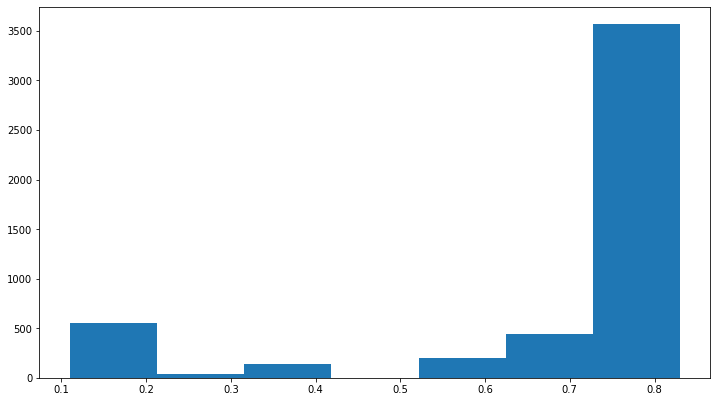

In [7]:
plt.hist(survey['lv_index'], bins=7)
plt.show()

In [8]:
survey['lv_index'].value_counts()

0.83    3565
0.11     509
0.63     437
0.59     203
0.40      72
0.34      63
0.23      42
0.13      42
Name: lv_index, dtype: int64

In [9]:
survey['lv_weight'] = normalize_weights(survey['weight'] * survey['lv_index'])
survey['rv_weight'] = normalize_weights(survey['weight'] * survey['rv_index'])
print(survey['lv_weight'].mean())
print(survey['rv_weight'].mean())

1.0
1.0


In [10]:
survey.to_csv('responses_processed_national_weighted.csv', index=False)

## California National Weighting

In [11]:
ca_national_survey = survey.copy()
demographics = ['gender', 'race', 'education', 'income', 'age', 'vote2016']
output = run_weighting_iteration(ca_national_survey, census='US_CA', weigh_on=['vote2016'])
ca_potus_weights = output['weights']['vote2016']
ca_potus_weights = ca_national_survey['vote2016'].astype(str).replace(ca_potus_weights)
ca_national_survey['weight'] = normalize_weights(ca_national_survey['weight'] * ca_potus_weights)
ca_national_survey['lv_weight'] = normalize_weights(ca_national_survey['weight'] * ca_national_survey['lv_index'])
ca_national_survey['rv_weight'] = normalize_weights(ca_national_survey['weight'] * ca_national_survey['rv_index'])
run_weighting_iteration(ca_national_survey, census='US_CA', weigh_on=demographics)

## vote2016 ##
Did not vote       0.974207
Donald Trump       0.663662
Hillary Clinton    1.240880
Other              1.121250
dtype: float64
ERROR: 0.1788137960181947
-
-
{'vote2016': 0.3363376957963128}
TOTAL ERROR: 0.1788137960181947
## gender ##
Female               0.952850
Male                 1.023651
Other                1.050018
Prefer not to say    0.973481
dtype: float64
ERROR: 0.03583059903010189
-
-
## race ##
Asian or Asian American      1.548276
Black or African American    0.244783
Hispanic or Latino           1.604736
Other                        1.209373
White or Caucasian           0.392831
dtype: float64
ERROR: 0.5994785017992587
-
-
## education ##
Completed graduate school     0.976028
Graduated from college        0.902175
Graduated from high school    0.679686
Less than high school         1.499581
Some college, no degree       0.942530
dtype: float64
ERROR: 0.10451208209855302
-
-
## income ##
Between $100,000 and $150,000    1.067702
Between $15,000 and $49,99

{'errors': [0.03583059903010189,
  0.5994785017992587,
  0.10451208209855302,
  0.025829577610564997,
  0.17839021628748697,
  1.2331735290550618e-15],
 'error_table': {'race': 0.7552170281140246,
  'education': 0.4995805186655533,
  'age': 0.23415995557889602,
  'income': 0.06770186114438137,
  'gender': 0.050018060704363654,
  'vote2016': 2.3314683517128287e-15},
 'weights': {'gender': Female               0.952850
  Male                 1.023651
  Other                1.050018
  Prefer not to say    0.973481
  dtype: float64,
  'race': Asian or Asian American      1.548276
  Black or African American    0.244783
  Hispanic or Latino           1.604736
  Other                        1.209373
  White or Caucasian           0.392831
  dtype: float64,
  'education': Completed graduate school     0.976028
  Graduated from college        0.902175
  Graduated from high school    0.679686
  Less than high school         1.499581
  Some college, no degree       0.942530
  dtype: float64,
  '

In [12]:
ca_national_survey.to_csv('responses_processed_ca_weighted.csv', index=False)

## California State Weighting

In [13]:
ca_state_survey = survey.copy()
ca_state_survey = ca_state_survey.loc[ca_state_survey['state'] == 'California']
demographics = ['gender', 'race', 'education', 'income', 'age', 'vote2016']
run_weighting_iteration(ca_state_survey, weigh_on=demographics, census='US_CA')

## gender ##
Female               1.424568
Male                 1.038210
Other                0.581135
Prefer not to say    0.956088
dtype: float64
ERROR: 0.22001982145762808
-
-
## race ##
Asian or Asian American      0.886883
Black or African American    0.957693
Hispanic or Latino           1.318781
Other                        0.949486
White or Caucasian           0.887157
dtype: float64
ERROR: 0.13531555562642267
-
-
## education ##
Completed graduate school     0.993779
Graduated from college        0.878140
Graduated from high school    0.738909
Less than high school         1.513204
Some college, no degree       0.875968
dtype: float64
ERROR: 0.12371930957772853
-
-
## income ##
Between $100,000 and $150,000    0.730080
Between $15,000 and $49,999      1.246111
Between $50,000 and $74,999      1.574756
Between $75,000 and $99,999      1.009429
Over $150,000                    0.544368
Under $15,000                    0.895256
dtype: float64
ERROR: 0.2446006182195892
-
-
## age 

{'errors': [0.22001982145762808,
  0.13531555562642267,
  0.12371930957772853,
  0.2446006182195892,
  0.13533782067335848,
  0.23957388919474507],
 'error_table': {'vote2016': 0.6221392086744117,
  'income': 0.5747560253627193,
  'education': 0.513204426985705,
  'gender': 0.42456772083682526,
  'race': 0.318781243520887,
  'age': 0.3016641021732185},
 'weights': {'gender': Female               1.424568
  Male                 1.038210
  Other                0.581135
  Prefer not to say    0.956088
  dtype: float64,
  'race': Asian or Asian American      0.886883
  Black or African American    0.957693
  Hispanic or Latino           1.318781
  Other                        0.949486
  White or Caucasian           0.887157
  dtype: float64,
  'education': Completed graduate school     0.993779
  Graduated from college        0.878140
  Graduated from high school    0.738909
  Less than high school         1.513204
  Some college, no degree       0.875968
  dtype: float64,
  'income': Betw

In [14]:
output = run_weighting_scheme(ca_state_survey, iters=30, weigh_on=demographics, census='US_CA', verbose=1)

ITER 1/1 - initialization - ERROR 30
ITER 2/30 - weight gender - ERROR 2.5873486101860426
ITER 3/30 - weight race - ERROR 2.496823662180782
ITER 4/30 - weight education - ERROR 2.2168866711259874
ITER 5/30 - weight income - ERROR 1.8420000790794464
ITER 6/30 - weight age - ERROR 1.3000938118401266
ITER 7/30 - weight vote2016 - ERROR 1.2346875178930459
ITER 8/30 - weight gender - ERROR 0.8184395610450931
ITER 9/30 - weight education - ERROR 0.9586451984915771
ITER 10/30 - weight race - ERROR 1.0059750728108308
ITER 11/30 - weight gender - ERROR 0.5691838478042431
ITER 12/30 - weight age - ERROR 0.5083163536795938
ITER 13/30 - weight education - ERROR 0.45131633087885
ITER 14/30 - weight gender - ERROR 0.37386037854931753
ITER 15/30 - weight race - ERROR 0.4265763154243949
ITER 16/30 - weight age - ERROR 0.27355439992304004
ITER 17/30 - weight education - ERROR 0.34357531123150914
ITER 18/30 - weight gender - ERROR 0.263303355932926
ITER 19/30 - weight income - ERROR 0.19432276732579046


In [15]:
ca_state_survey = output['final_df']
ca_state_survey['lv_weight'] = normalize_weights(ca_state_survey['weight'] * ca_state_survey['lv_index'])
ca_state_survey['rv_weight'] = normalize_weights(ca_state_survey['weight'] * ca_state_survey['rv_index'])
_ = run_weighting_iteration(ca_state_survey, weigh_on=demographics, census='US_CA')

## gender ##
Female               0.990371
Male                 0.979552
Other                0.974190
Prefer not to say    1.055887
dtype: float64
ERROR: 0.015688085370046793
-
-
## race ##
Asian or Asian American      1.034824
Black or African American    0.983325
Hispanic or Latino           1.062521
Other                        0.947809
White or Caucasian           0.971520
dtype: float64
ERROR: 0.03558074343366535
-
-
## education ##
Completed graduate school     1.0
Graduated from college        1.0
Graduated from high school    1.0
Less than high school         1.0
Some college, no degree       1.0
dtype: float64
ERROR: 8.617807489580593e-16
-
-
## income ##
Between $100,000 and $150,000    0.984976
Between $15,000 and $49,999      0.989056
Between $50,000 and $74,999      1.007725
Between $75,000 and $99,999      1.001150
Over $150,000                    1.007863
Under $15,000                    1.009230
dtype: float64
ERROR: 0.008998831927996352
-
-
## age ##
18-24    0.990929

In [16]:
ca_state_survey.to_csv('responses_processed_ca_state_ca_weighted.csv', index=False)

## Texas National Weighting

In [17]:
tx_national_survey = survey.copy()
output = run_weighting_iteration(tx_national_survey, census='US_TX', weigh_on=['vote2016'])
tx_potus_weights = output['weights']['vote2016']
tx_potus_weights = tx_national_survey['vote2016'].astype(str).replace(tx_potus_weights)
tx_national_survey['weight'] = normalize_weights(tx_national_survey['weight'] * tx_potus_weights)
tx_national_survey['lv_weight'] = normalize_weights(tx_national_survey['weight'] * tx_national_survey['lv_index'])
tx_national_survey['rv_weight'] = normalize_weights(tx_national_survey['weight'] * tx_national_survey['rv_index'])
run_weighting_iteration(tx_national_survey, census='US_TX', weigh_on=demographics)

## vote2016 ##
Did not vote       1.052218
Donald Trump       1.184021
Hillary Clinton    0.938801
Other              0.824960
dtype: float64
ERROR: 0.08946675607854256
-
-
{'vote2016': 0.1840211181969469}
TOTAL ERROR: 0.08946675607854256
## gender ##
Female               0.998838
Male                 1.004425
Other                0.970511
Prefer not to say    1.026226
dtype: float64
ERROR: 0.0032305606781402397
-
-
## race ##
Asian or Asian American      0.690540
Black or African American    0.741686
Hispanic or Latino           2.149114
Other                        0.905751
White or Caucasian           0.512909
dtype: float64
ERROR: 0.4800649763099724
-
-
## education ##
Completed graduate school     0.870650
Graduated from college        0.918460
Graduated from high school    0.850958
Less than high school         1.367713
Some college, no degree       0.992219
dtype: float64
ERROR: 0.07983899828499558
-
-
## income ##
Between $100,000 and $150,000    0.906688
Between $15,000 and $4

{'errors': [0.0032305606781402397,
  0.4800649763099724,
  0.07983899828499558,
  0.14129796188702873,
  0.12556673732032558,
  1.2013049743648282e-15],
 'error_table': {'race': 1.1491141038252244,
  'education': 0.36771333290181096,
  'income': 0.24860267616190346,
  'age': 0.14507229447705372,
  'gender': 0.02948934073784748,
  'vote2016': 2.1094237467877974e-15},
 'weights': {'gender': Female               0.998838
  Male                 1.004425
  Other                0.970511
  Prefer not to say    1.026226
  dtype: float64,
  'race': Asian or Asian American      0.690540
  Black or African American    0.741686
  Hispanic or Latino           2.149114
  Other                        0.905751
  White or Caucasian           0.512909
  dtype: float64,
  'education': Completed graduate school     0.870650
  Graduated from college        0.918460
  Graduated from high school    0.850958
  Less than high school         1.367713
  Some college, no degree       0.992219
  dtype: float64,
  

In [18]:
tx_national_survey.to_csv('responses_processed_tx_weighted.csv', index=False)

## Texas State Weighting

In [19]:
tx_state_survey = survey.copy()
tx_state_survey = tx_state_survey.loc[tx_state_survey['state'] == 'Texas']
demographics = ['gender', 'race', 'education', 'income', 'age', 'vote2016']
run_weighting_iteration(tx_state_survey, weigh_on=demographics, census='US_TX')

## gender ##
Female               0.694760
Male                 0.648415
Other                1.899386
Prefer not to say    0.757439
dtype: float64
ERROR: 0.3369619990030636
-
-
## race ##
Asian or Asian American      0.942801
Black or African American    0.937138
Hispanic or Latino           1.584138
Other                        0.459235
White or Caucasian           1.076688
dtype: float64
ERROR: 0.16443231300449562
-
-
## education ##
Completed graduate school     0.664945
Graduated from college        0.957633
Graduated from high school    0.956969
Less than high school         1.762688
Some college, no degree       0.657765
dtype: float64
ERROR: 0.20184609011425955
-
-
## income ##
Between $100,000 and $150,000    1.201603
Between $15,000 and $49,999      1.744841
Between $50,000 and $74,999      0.735569
Between $75,000 and $99,999      0.451876
Over $150,000                    0.802563
Under $15,000                    1.063548
dtype: float64
ERROR: 0.39109541310995927
-
-
## age 

{'errors': [0.3369619990030636,
  0.16443231300449562,
  0.20184609011425955,
  0.39109541310995927,
  0.283894958075178,
  0.2558844515210721],
 'error_table': {'gender': 0.8993856931818263,
  'vote2016': 0.7871508170287382,
  'education': 0.7626880357220667,
  'income': 0.7448412812367307,
  'race': 0.5841383820355375,
  'age': 0.32969252857621667},
 'weights': {'gender': Female               0.694760
  Male                 0.648415
  Other                1.899386
  Prefer not to say    0.757439
  dtype: float64,
  'race': Asian or Asian American      0.942801
  Black or African American    0.937138
  Hispanic or Latino           1.584138
  Other                        0.459235
  White or Caucasian           1.076688
  dtype: float64,
  'education': Completed graduate school     0.664945
  Graduated from college        0.957633
  Graduated from high school    0.956969
  Less than high school         1.762688
  Some college, no degree       0.657765
  dtype: float64,
  'income': Betwe

In [20]:
output = run_weighting_scheme(tx_state_survey, iters=50, weigh_on=demographics, census='US_TX', verbose=1)

ITER 1/1 - initialization - ERROR 50
ITER 2/50 - weight gender - ERROR 2.6337081871871866
ITER 3/50 - weight race - ERROR 2.429503220425014
ITER 4/50 - weight education - ERROR 2.4987359253584467
ITER 5/50 - weight income - ERROR 1.6928835229360675
ITER 6/50 - weight age - ERROR 1.7131725521332446
ITER 7/50 - weight vote2016 - ERROR 2.07841209067262
ITER 8/50 - weight gender - ERROR 0.8939444325440649
ITER 9/50 - weight education - ERROR 0.8056016666205318
ITER 10/50 - weight race - ERROR 0.9519073573314496
ITER 11/50 - weight age - ERROR 0.6175135241247831
ITER 12/50 - weight income - ERROR 0.5733816800486996
ITER 13/50 - weight education - ERROR 0.6724357839052421
ITER 14/50 - weight vote2016 - ERROR 0.5738854196877233
ITER 15/50 - weight gender - ERROR 0.4698226648101906
ITER 16/50 - weight race - ERROR 0.4887821236175499
ITER 17/50 - weight age - ERROR 0.3556048956173983
ITER 18/50 - weight education - ERROR 0.34493570730100753
ITER 19/50 - weight income - ERROR 0.30087797474092154

In [21]:
tx_state_survey = output['final_df']
tx_state_survey['lv_weight'] = normalize_weights(tx_state_survey['weight'] * tx_state_survey['lv_index'])
tx_state_survey['rv_weight'] = normalize_weights(tx_state_survey['weight'] * tx_state_survey['rv_index'])
_ = run_weighting_iteration(tx_state_survey, weigh_on=demographics, census='US_TX')

## gender ##
Female               0.975378
Male                 0.981782
Other                1.014476
Prefer not to say    1.028364
dtype: float64
ERROR: 0.021458262333675867
-
-
## race ##
Asian or Asian American      1.003599
Black or African American    0.988681
Hispanic or Latino           1.025538
Other                        0.994263
White or Caucasian           0.987919
dtype: float64
ERROR: 0.012291703116441342
-
-
## education ##
Completed graduate school     0.959914
Graduated from college        0.989845
Graduated from high school    1.014239
Less than high school         1.042529
Some college, no degree       0.993473
dtype: float64
ERROR: 0.014872112341276207
-
-
## income ##
Between $100,000 and $150,000    1.000484
Between $15,000 and $49,999      1.005449
Between $50,000 and $74,999      1.004202
Between $75,000 and $99,999      0.979339
Over $150,000                    1.000836
Under $15,000                    1.009690
dtype: float64
ERROR: 0.007892351305942595
-
-
##

In [22]:
tx_state_survey.to_csv('responses_processed_tx_state_tx_weighted.csv', index=False)